<a href="https://colab.research.google.com/github/lilyan122/Previs-o-de-Pre-os/blob/main/meu_projeto_de_houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Previsão de Preços Residenciais: Estimando o Valor das Casas**

• Dado um conjunto de dados contém muitos atributos sobre uma casa que está vendendo. O problema é prever o preço dessa casa.

• Entrada: atributos da casa

• Resultado: preço da casa

• Conjunto de dados: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


# Carregar e explorar dados

**Importar bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")



**Carregar Dados**

In [ ]:
df = pd.read_csv("train.csv")


**Análise de dados**

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Número De Células Ausentes**

In [ ]:
print("Valor ausente por coluna")
print(df.isna().sum())
print("-"*15)
print("Total:",df.isna().sum().sum())

Valor ausente por coluna
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
---------------
Total: 6965


**Eliminando Colunas com Valores Ausentes**

Considerando a presença de várias colunas com valores ausentes nos dados, é necessário remover os valores NaN (Not a Number) para que a regressão linear possa ser aplicada.
Analisando em detalhes, observamos que não podemos descartar as linhas, pois isso resultaria em um conjunto de dados vazio. Portanto, optei por descartar a coluna em questão.

In [ ]:
df = df.dropna(axis=1)

print("Valor ausente por coluna")
print(df.isna().sum())
print("-"*15)
print("Total:",df.isna().sum().sum())

Valor ausente por coluna
Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64
---------------
Total: 0


**Sem utilizar seleção de características**

In [ ]:
X = df.drop(["Id","SalePrice"], axis=1)
y = df["SalePrice"]

**Normalização**

É necessário normalizar os dados para manter sua magnitude em relação uns aos outros. Neste projeto, escolhi usar a normalização Z-score para lidar melhor com valores incomuns que possam existir nos dados

In [ ]:
scaler = StandardScaler()
X[X.select_dtypes(include='number').columns] = scaler.fit_transform(X.select_dtypes(include='number'))
X.head()


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,RL,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,WD,Normal
1,-0.872563,RL,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,WD,Normal
2,0.073375,RL,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,WD,Normal
3,0.309859,RL,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,WD,Abnorml
4,0.073375,RL,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,WD,Normal


**One-Hot Encoding**

O "one-hot encoding" é uma técnica utilizada para converter atributos nominais em atributos numéricos. Isso é necessário porque muitos algoritmos de aprendizado de máquina, como a regressão linear, requerem que os dados de entrada sejam numéricos.

In [ ]:
X = pd.get_dummies(X)
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,0,0,0,1,0,0,0,0,1,0


**Separação dos dados**

Para evitar o overfitting, os dados serão divididos em dois conjuntos: treinamento (80%) e teste (20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Treinar o modelo**

In [ ]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Usei o RMSE, uma métrica comum para avaliar modelos de regressão linear, para medir o desempenho do nosso modelo. O RMSE fornece uma medida da diferença média entre as previsões e os valores reais. Quanto menor o valor do RMSE, melhor o modelo se ajusta aos dados de teste.

In [ ]:
def RMSE(target, pred):
    return np.sqrt(mean_squared_error(target, pred))

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Treino RMSE:", RMSE(y_train, pred_train))
print("Teste RMSE:", RMSE(y_test, pred_test))


Treino RMSE: 21447.796067384555
Teste RMSE: 11510794135292.477


Com base nos resultados, podemos observar que nosso modelo de regressão linear está sofrendo de overfitting. Isso fica evidente pela diferença significativa entre o desempenho nos conjuntos de treinamento e teste.

Enquanto o modelo apresenta um desempenho aceitável no conjunto de treinamento, o desempenho no conjunto de teste é consideravelmente pior. Essa discrepância indica que o modelo está se ajustando muito bem aos dados de treinamento, mas não consegue generalizar adequadamente para novos dados.

**Usando a seleção de características**

Para abordar o problema de overfitting e melhorar o desempenho do nosso modelo, utilizamos a seleção de características. Uma das técnicas empregadas foi o cálculo da correlação de Pearson

In [ ]:
correlacao = df.corr()
correlacao_preco = correlacao["SalePrice"]

**Mapa de calor**

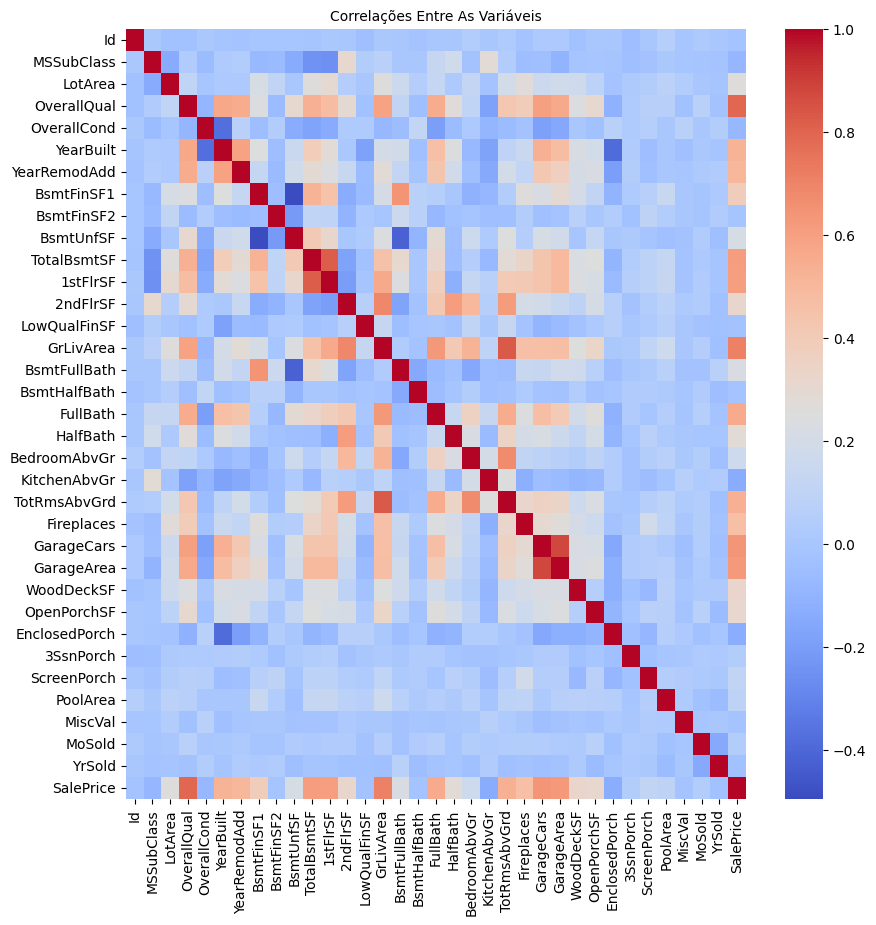

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlacao, cmap="coolwarm")
plt.title("Correlações Entre As Variáveis", size=10)
plt.show()

Seleção de atributos é uma etapa essencial em projetos de ciência de dados, onde escolhemos os atributos mais relevantes. O coeficiente de correlação de Pearson é comumente usado para avaliar a relação entre atributos numéricos e o atributo alvo. No entanto, para atributos nominais, podemos utilizar conhecimento de domínio para selecionar os mais relevantes. A seleção pode ser feita considerando atributos como OverallQual, YearBuilt, YearRemoteAdd (numéricos) e Utilities, Heating (nominais), que podem impactar o preço de uma casa. Isso melhora a análise e criação de modelos mais precisos.

In [ ]:
correlation_threshold = 0.50

colunas_numerec = correlacao_preco[abs(correlacao_preco) > correlation_threshold].index.tolist()

categoria_colus = ["Utilities", "Heating", "KitchenQual", "SaleCondition", "LandSlope"]

cols_principal = colunas_numerec + categoria_colus

cols_principal.remove("Id") if "Id" in cols_principal else print("A coluna [Id] não está na important_cols")


A coluna [Id] não está na important_cols


**Criar conjunto de dado**

In [ ]:
X = df[cols_principal]
X = X.drop(columns="SalePrice", axis=1)
y = df["SalePrice"]
colunas_numerec.remove("SalePrice")


**Normalizar**

In [ ]:
scaler = StandardScaler()
X[colunas_numerec] = scaler.fit_transform(X[colunas_numerec])
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Utilities,Heating,KitchenQual,SaleCondition,LandSlope
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,AllPub,GasA,Gd,Normal,Gtl
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,AllPub,GasA,TA,Normal,Gtl
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,AllPub,GasA,Gd,Normal,Gtl
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,AllPub,GasA,Gd,Abnorml,Gtl
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,AllPub,GasA,Gd,Normal,Gtl


**One-hot encoding**

In [ ]:
X = pd.get_dummies(X)
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


**Separar dados**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Treinar o modelo**

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

**Análise**

In [ ]:
pred_train = model1.predict(X_train)
pred_test = model1.predict(X_test)

print("Treino RMSE:",RMSE(y_train, pred_train))
print("Teste RMSE:",RMSE(y_test, pred_test))

Treino RMSE: 34898.131046915834
Teste RMSE: 37906.61872608867


**Notamos uma melhoria significativa no desempenho do modelo nos dados de teste.**

**Análise dos resultados e teste final**

**Carregar dados e importar o imputador**

In [ ]:
import numpy as np
from  sklearn.impute import SimpleImputer

teste = pd.read_csv("test.csv")

**Seleção de atributos**

In [ ]:
atributos_selecionados = cols_principal.copy()
atributos_selecionados.remove("SalePrice")
X_final = teste[atributos_selecionados]
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1459 non-null   int64  
 1   YearBuilt      1459 non-null   int64  
 2   YearRemodAdd   1459 non-null   int64  
 3   TotalBsmtSF    1458 non-null   float64
 4   1stFlrSF       1459 non-null   int64  
 5   GrLivArea      1459 non-null   int64  
 6   FullBath       1459 non-null   int64  
 7   TotRmsAbvGrd   1459 non-null   int64  
 8   GarageCars     1458 non-null   float64
 9   GarageArea     1458 non-null   float64
 10  Utilities      1457 non-null   object 
 11  Heating        1459 non-null   object 
 12  KitchenQual    1458 non-null   object 
 13  SaleCondition  1459 non-null   object 
 14  LandSlope      1459 non-null   object 
dtypes: float64(3), int64(7), object(5)
memory usage: 171.1+ KB


**Tratar dados ausentes**

In [ ]:
preencher= SimpleImputer(missing_values=np.nan,strategy="most_frequent")
X_final[:] = preencher.fit_transform(X_final)
print([X_final])

[      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               5       1961          1961        882.0       896        896   
1               6       1958          1958       1329.0      1329       1329   
2               5       1997          1998        928.0       928       1629   
3               6       1998          1998        926.0       926       1604   
4               8       1992          1992       1280.0      1280       1280   
...           ...        ...           ...          ...       ...        ...   
1454            4       1970          1970        546.0       546       1092   
1455            4       1970          1970        546.0       546       1092   
1456            5       1960          1996       1224.0      1224       1224   
1457            5       1992          1992        912.0       970        970   
1458            7       1993          1994        996.0       996       2000   

      FullBath  TotRmsAbvGrd  GarageCa

**Normaliza**

In [ ]:
norma_types = X_final.dtypes
numeric_col = norma_types[norma_types!='object'].index

scaler = StandardScaler()
X_final[numeric_col] = scaler.fit_transform(X_final[numeric_col])
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Utilities,Heating,KitchenQual,SaleCondition,LandSlope
0,-0.751101,-0.340945,-1.072885,-0.368484,-0.654561,-1.215588,-1.028720,-0.918335,-0.988189,1.185511,AllPub,GasA,TA,Normal,Gtl
1,-0.054877,-0.439695,-1.214908,0.639542,0.433298,-0.323539,-1.028720,-0.255371,-0.988189,-0.738518,AllPub,GasA,Gd,Normal,Gtl
2,-0.751101,0.844059,0.678742,-0.264750,-0.574165,0.294508,0.773083,-0.255371,0.301406,0.043982,AllPub,GasA,TA,Normal,Gtl
3,-0.054877,0.876976,0.678742,-0.269260,-0.579190,0.243004,0.773083,0.407593,0.301406,-0.011253,AllPub,GasA,Gd,Normal,Gtl
4,1.337571,0.679475,0.394694,0.529042,0.310192,-0.424487,0.773083,-0.918335,0.301406,0.154452,AllPub,GasA,Gd,Normal,Gtl


**Transformação one-hot e reorganização do índice usando o modelo**

In [ ]:
X_final = pd.get_dummies(X_final)
X_final = X_final.reindex(columns=X_train.columns,fill_value=0)
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-0.751101,-0.340945,-1.072885,-0.368484,-0.654561,-1.215588,-1.028720,-0.918335,-0.988189,1.185511,...,1,0,0,0,0,1,0,1,0,0
1,-0.054877,-0.439695,-1.214908,0.639542,0.433298,-0.323539,-1.028720,-0.255371,-0.988189,-0.738518,...,0,0,0,0,0,1,0,1,0,0
2,-0.751101,0.844059,0.678742,-0.264750,-0.574165,0.294508,0.773083,-0.255371,0.301406,0.043982,...,1,0,0,0,0,1,0,1,0,0
3,-0.054877,0.876976,0.678742,-0.269260,-0.579190,0.243004,0.773083,0.407593,0.301406,-0.011253,...,0,0,0,0,0,1,0,1,0,0
4,1.337571,0.679475,0.394694,0.529042,0.310192,-0.424487,0.773083,-0.918335,0.301406,0.154452,...,0,0,0,0,0,1,0,1,0,0


**Previsão final**

In [ ]:
pred = model1.predict(X_final)
teste['SalePrice'] = pred
resultado = teste[["Id","SalePrice"]]
df = pd.DataFrame(resultado)
df = df.rename(columns={
    'Id':'ID', 'SalePrice':'Preço de venda'})
df


,ID,Preço de venda
0,1461,109883.370167
1,1462,160537.785169
2,1463,168409.536830
3,1464,191314.976667
4,1465,212599.318821
5,1466,180131.804169
6,1467,168209.017190
7,1468,173021.898094
8,1469,202064.490995
9,1470,105710.487372
